#**CROP YIELD PREDICTION**

#Dataset 1

##Reading Dataset

In [1]:
import pandas as pd
df = pd.read_csv('c:/Users/HP LAPTOP/onedrive/desktop/smart-farming-ml-proj/app/Data/crop_production.csv', encoding='utf-8')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


##Corelation Heatmap

In [2]:
df = df[df['State_Name'] == "Andhra Pradesh"]

In [3]:
df['Yield'] = df['Production']/df['Area']
df

C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_22744\32723743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yield'] = df['Production']/df['Area']


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
203,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0,0.121495
204,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0,0.357143
205,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0,0.100000
206,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0,1.287671
207,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0,1.918919
...,...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,3.177173
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,13.549107
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,0.892027
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477


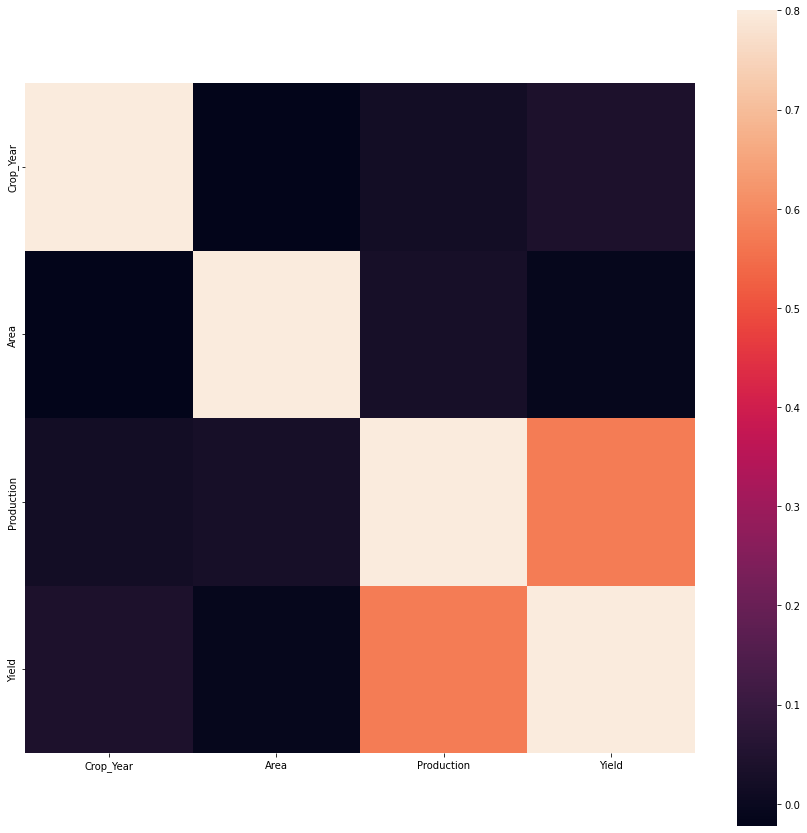

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [5]:
df = df[df['Crop_Year']>=2004]
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
493,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,32752.0,7893.0,0.240993
494,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1021.0,403.0,0.394711
495,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1578.0,923.0,0.584918
496,Andhra Pradesh,ANANTAPUR,2004,Kharif,Cotton(lint),8933.0,7041.0,0.788201
497,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3402.0,11288.0,3.318048
...,...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,3.177173
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,13.549107
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,0.892027
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477


In [6]:
df = df.join(pd.get_dummies(df['District_Name']))
df = df.join(pd.get_dummies(df['Season']))
df = df.join(pd.get_dummies(df['Crop']))
df = df.join(pd.get_dummies(df['Crop_Year']))
df = df.join(pd.get_dummies(df['State_Name']))
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,ANANTAPUR,CHITTOOR,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,32752.0,7893.0,0.240993,1,0,...,0,0,0,0,0,0,0,0,0,1
494,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1021.0,403.0,0.394711,1,0,...,0,0,0,0,0,0,0,0,0,1
495,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1578.0,923.0,0.584918,1,0,...,0,0,0,0,0,0,0,0,0,1
496,Andhra Pradesh,ANANTAPUR,2004,Kharif,Cotton(lint),8933.0,7041.0,0.788201,1,0,...,0,0,0,0,0,0,0,0,0,1
497,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3402.0,11288.0,3.318048,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,3.177173,0,0,...,0,0,0,0,0,0,0,0,1,1
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,13.549107,0,0,...,0,0,0,0,0,0,0,0,1,1
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,0.892027,0,0,...,0,0,0,0,0,0,0,0,1,1
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477,0,0,...,0,0,0,0,0,0,0,0,1,1


In [7]:
df=df.drop('District_Name', axis=1)
df = df.drop('Season',axis=1)
df = df.drop('Crop',axis=1)
df = df.drop('Crop_Year', axis=1)
df = df.drop('Production', axis=1)
df = df.drop('State_Name', axis=1)
df

,Area,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,32752.0,0.240993,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
494,1021.0,0.394711,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
495,1578.0,0.584918,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
496,8933.0,0.788201,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
497,3402.0,3.318048,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,28046.0,3.177173,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9827,224.0,13.549107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9828,5418.0,0.892027,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9829,21729.0,33089.005477,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [8]:
from sklearn import preprocessing

In [9]:

# Create x, where x the 'scores' column's values as floats
x = df[['Area']].values.astype(float)
x
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
#df_normalized = pd.DataFrame(x_scaled)
x_scaled

df['Area'] = x_scaled
df

,Area,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,0.037343,0.240993,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
494,0.001163,0.394711,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
495,0.001798,0.584918,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
496,0.010184,0.788201,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
497,0.003878,3.318048,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,0.031977,3.177173,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9827,0.000254,13.549107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9828,0.006177,0.892027,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9829,0.024775,33089.005477,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [10]:
df.head()

,Area,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,0.037343,0.240993,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
494,0.001163,0.394711,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
495,0.001798,0.584918,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
496,0.010184,0.788201,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
497,0.003878,3.318048,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##Train and Test Split

In [11]:
df = df.fillna(df.mean())

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
b = df['Yield']
a = df.drop('Yield', axis = 1)

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

print(a_train)
print(a_test)
print(b_train)
print(b_test)

          Area  ANANTAPUR  CHITTOOR  EAST GODAVARI  GUNTUR  KADAPA  KRISHNA  \
1711  0.000246          0         1              0       0       0        0   
5452  0.031408          0         0              0       0       0        0   
538   0.003756          1         0              0       0       0        0   
2336  0.014880          0         0              1       0       0        0   
2172  0.001397          0         0              1       0       0        0   
...        ...        ...       ...            ...     ...     ...      ...   
6278  0.001999          0         0              0       0       0        0   
8796  0.000129          0         0              0       0       0        0   
8831  0.000385          0         0              0       0       0        0   
8995  0.000344          0         0              0       0       0        0   
1644  0.000268          0         1              0       0       0        0   

      KURNOOL  PRAKASAM  SPSR NELLORE  ...  2006  2

In [14]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

###Linear Regression

In [15]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

linear_reg = LinearRegression().fit(a_train, b_train)
b_pred = linear_reg.predict(a_test)
print('MSE =', mse(b_pred, b_test))
print('MAE =', mae(b_pred, b_test))
print('R2 Score =', r2_score(b_pred, b_test))

MSE = 425143.33717281383
MAE = 150.5553489978409
R2 Score = 0.8536217455287963


###Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(a_train, b_train)
b_pred = regr.predict(a_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE =', mse(b_pred, b_test))
print('MAE =', mae(b_pred, b_test))
print('R2 Score =', r2_score(b_pred, b_test))

MSE = 344244.0619993072
MAE = 79.0739528510798
R2 Score = 0.8897409726497765


###Support Vector Regressor

In [17]:
from sklearn.svm import SVR
svr=SVR(kernel='poly',epsilon=1.0)
svr.fit(a_train,b_train)
pred=svr.predict(a_test)
print(svr.score(a_test,b_test))
print('R2 Score =',r2_score(b_test,b_pred))
print('MSE =', mse(b_pred, b_test))
print('MAE =', mae(b_pred, b_test))

-0.015749823211382186
R2 Score = 0.8863535872418126
MSE = 344244.0619993072
MAE = 79.0739528510798


###Lasso Regressor

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


clf = linear_model.Lasso(alpha=0.1)
clf.fit(a_train, b_train)
b_pred = clf.predict(a_test)
print('R2 Score =',r2_score(b_test,b_pred))
print('MSE =', mse(b_pred, b_test))
print('MAE =', mae(b_pred, b_test))

R2 Score = 0.8597008788030227
MSE = 424977.24480354163
MAE = 147.73567865425326


###Bayesian Ridge Regression

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
clf = linear_model.BayesianRidge()
clf.fit(a_train, b_train)
b_pred = clf.predict(a_test)
print('R2 Score =',r2_score(b_test,b_pred))
print('MSE =', mse(b_pred, b_test))
print('MAE =', mae(b_pred, b_test))

R2 Score = 0.8599787555491647
MSE = 424135.533943467
MAE = 150.24045679426354


Saving Best Trained Model 